<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/10week/HAR_CNN_LSTM_CNN%2BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [12]:
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

In [13]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [14]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    # trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI-HAR/UCI-HAR/')
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/3-2/MLprogramming/10week/UCI-HAR/')
    # load all test
    # testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI-HAR/UCI-HAR/')
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/3-2/MLprogramming/10week/UCI-HAR/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [15]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [16]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_one_hot.shape[1]

In [17]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Dropout,
    Conv1D, MaxPooling1D, LSTM, concatenate
)
from tensorflow.keras.utils import to_categorical


In [18]:
##Level_1
# layer 1
inputs1_1= Input(shape=(n_timesteps,n_features))##128,9
conv1_1 = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs1_1) ##none,126,128
# layer 2
inputs1_2= Input(shape=(n_timesteps,n_features))
conv1_2 = Conv1D(filters=128, kernel_size=5, activation='relu')(inputs1_2)##124,128
# layer 3
inputs1_3= Input(shape=(n_timesteps,n_features))
conv1_3 = Conv1D(filters=128, kernel_size=7, activation='relu')(inputs1_3)##122,128
# layer 4
inputs1_4= Input(shape=(n_timesteps,n_features))
conv1_4 = Conv1D(filters=128, kernel_size=9, activation='relu')(inputs1_4)##120,128

# merge1
merged_1 = concatenate([conv1_1,conv1_2,conv1_3,conv1_4],axis=1)

#maxpool1
pool_1=MaxPooling1D(pool_size=5)(merged_1)

##Level_2
# layer 1
conv2_1 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool_1)
# layer 2
conv2_2 = Conv1D(filters=64, kernel_size=5, activation='relu')(pool_1)
# layer 3
conv2_3 = Conv1D(filters=64, kernel_size=7, activation='relu')(pool_1)
# layer 4

conv2_4 = Conv1D(filters=64, kernel_size=9, activation='relu')(pool_1)
# merge2
merged_2 = concatenate([conv2_1,conv2_2,conv2_3,conv2_4],axis=1)

#maxpool2
pool_2=MaxPooling1D(pool_size=5)(merged_2)


##Level_3
# layer 1
conv3_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(pool_2)
# layer 2
conv3_2 = Conv1D(filters=32, kernel_size=5, activation='relu')(pool_2)
# layer 3
conv3_3 = Conv1D(filters=32, kernel_size=7, activation='relu')(pool_2)
# layer 4

conv3_4 = Conv1D(filters=32, kernel_size=9, activation='relu')(pool_2)
# merge2
merged_3 = concatenate([conv3_1,conv3_2,conv3_3,conv3_4],axis=1)

#maxpool2
pool_3=MaxPooling1D(pool_size=5)(merged_3)


#flatten
flat_cnn=Flatten()(pool_3)

##dense layer
dense = Dense(512, activation='relu')(flat_cnn)
outputs = Dense(n_outputs, activation='softmax')(dense)

##MODEL
cnn3_model = Model([inputs1_1, inputs1_2, inputs1_3,inputs1_4], outputs)

cnn3_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn3_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 126, 128)  │      3,584 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 124, 128)  │      5,888 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 122, 128)  │      8,192 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 120, 128)  │     10,496 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 492, 128)  │          0 │ conv1d[0][0],     │
│ (Concatenate)       │                   │            │ conv1d_1[0][0],   │
│                     │                   │            │ conv1d_2[0][0],   │
│                     │                   │            │ conv1d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 98, 128)   │          0 │ concatenate[0][0] │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 96, 64)    │     24,640 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 94, 64)    │     41,024 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 92, 64)    │     57,408 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 90, 64)    │     73,792 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 372, 64)   │          0 │ conv1d_4[0][0],   │
│ (Concatenate)       │                   │            │ conv1d_5[0][0],   │
│                     │                   │            │ conv1d_6[0][0],   │
│                     │                   │            │ conv1d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 74, 64)    │          0 │ concatenate_1[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 72, 32)    │      6,176 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 70, 32)    │     10,272 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 68, 32)    │     14,368 │ max_pooling1d_1[

 Total params: 1,179,014 (4.50 MB)

 Trainable params: 1,179,014 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_history=cnn3_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.7425 - loss: 0.6270 - val_accuracy: 0.9576 - val_loss: 0.1081
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9461 - loss: 0.1163 - val_accuracy: 0.9525 - val_loss: 0.1084
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9579 - loss: 0.1072 - val_accuracy: 0.9491 - val_loss: 0.1090
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9523 - loss: 0.1282 - val_accuracy: 0.9491 - val_loss: 0.1170
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9415 - loss: 0.1381 - val_accuracy: 0.9593 - val_loss: 0.0945
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9606 - loss: 0.0967 - val_accuracy: 0.9576 - val_loss: 0.0895
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9603 - loss: 0.0861 - val_accuracy: 0.9576 - val_loss: 0.0892
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9592 - loss: 0.0842 - val_accuracy: 

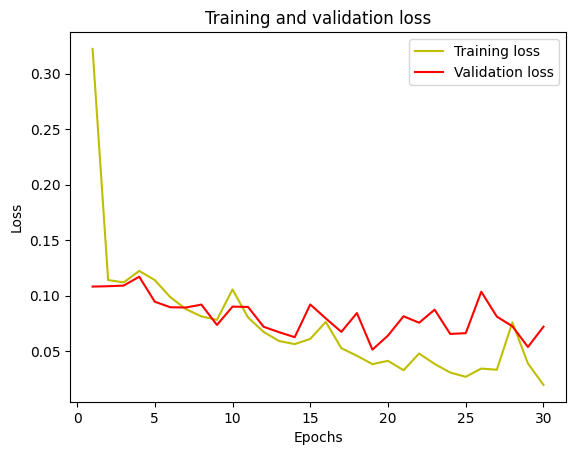

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

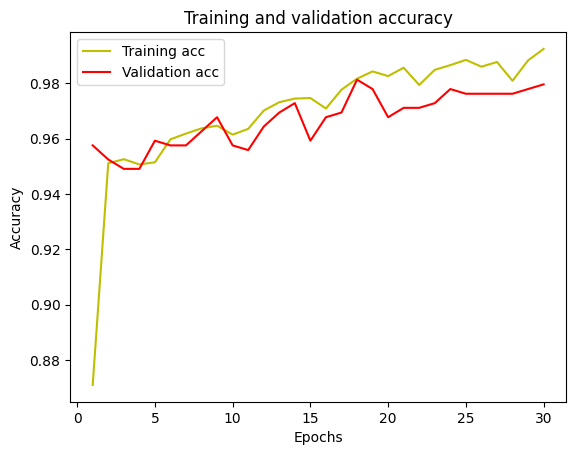

In [21]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
[[473   5  18   0   0   0]
 [ 11 454   6   0   0   0]
 [  1   0 419   0   0   0]
 [  0   1   0 400  88   2]
 [  0   0   0  32 500   0]
 [  0   0   0   0   1 536]]
0.9440108585001696
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       496
           1       0.99      0.96      0.98       471
           2       0.95      1.00      0.97       420
           3       0.93      0.81      0.87       491
           4       0.85      0.94      0.89       532
           5       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



<Axes: >

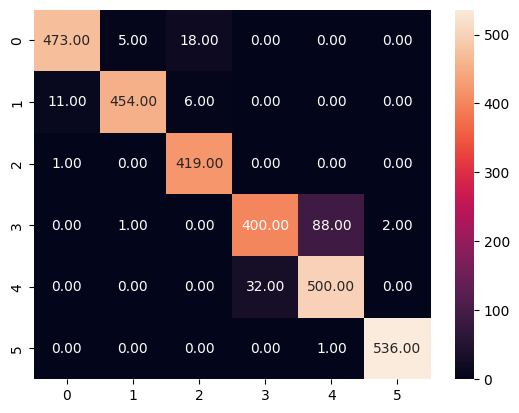

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=cnn3_model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

1D CNN을 4개 사용 각각 같은 데이터 넣었음, concat 후 다음 레이어

---

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val

LSTM

In [23]:
import numpy as np, pandas as pd, tensorflow as tf

In [24]:
# # 4. LSTM 모델
# model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(64, input_shape=(window,1)),
#     tf.keras.layers.Dense(1)
# ])
# model.compile(optimizer='adam', loss='mse', metrics=["mae"])
# model_history=model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

In [25]:
inputs_lstm= Input(shape=(n_timesteps,n_features))##128,9

# inputs1_1= Input(shape=(n_timesteps,n_features))##128,9
# conv1_1 = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs1_1) ##none,126,128

# 4. LSTM 모델
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(n_timesteps,n_features)),
    tf.keras.layers.Dense(6, activation='softmax') # Changed to n_outputs (6) and softmax activation
])
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model_lstm_history=model_lstm.fit(X_train, y_train_one_hot, epochs=30, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


662/662 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4547 - loss: 1.3196 - val_accuracy: 0.5823 - val_loss: 0.9501
Epoch 2/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6411 - loss: 0.8239 - val_accuracy: 0.6027 - val_loss: 0.9846
Epoch 3/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6474 - loss: 0.8933 - val_accuracy: 0.7436 - val_loss: 0.6566
Epoch 4/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8139 - loss: 0.5132 - val_accuracy: 0.9100 - val_loss: 0.2833
Epoch 5/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8960 - loss: 0.2984 - val_accuracy: 0.9151 - val_loss: 0.3428
Epoch 6/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9158 - loss: 0.2603 - val_accuracy: 0.9457 - val_loss: 0.1680
Epoch 7/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9254 - loss: 0.2145 - val_accuracy: 0.9389 - val_loss: 0.1423
Epoch 8/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9333 - loss: 0.1883 - val_accuracy: 0.7012 - va

In [52]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,004 (226.58 KB)

 Trainable params: 19,334 (75.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,670 (151.06 KB)

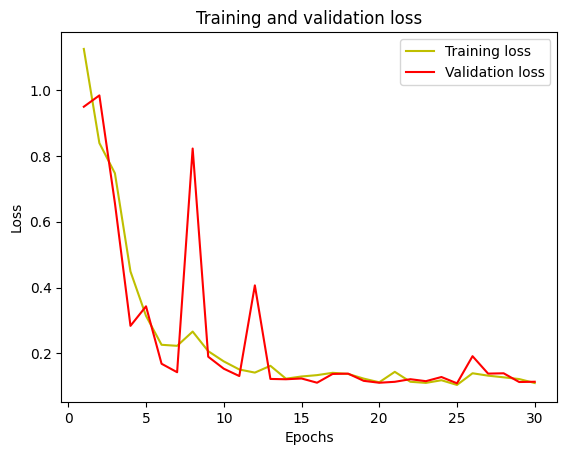

In [26]:
loss =model_lstm_history.history['loss']
val_loss =model_lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

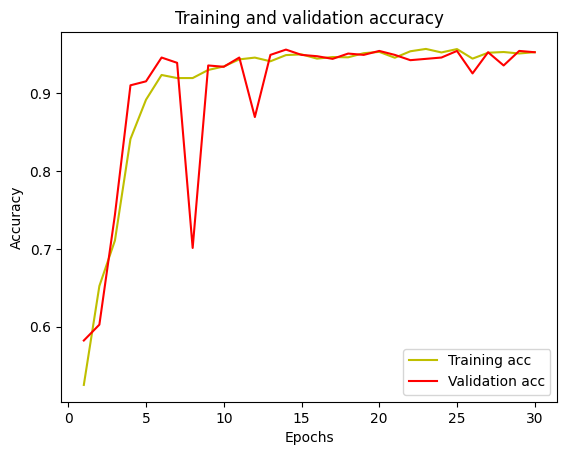

In [27]:
acc =model_lstm_history.history['accuracy']
val_acc =model_lstm_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[455   8  33   0   0   0]
 [  6 447  18   0   0   0]
 [  7   4 409   0   0   0]
 [  0   2   0 375 114   0]
 [  0   2   1  77 452   0]
 [  0  27   0   0   0 510]]
0.8985408890397014
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       496
           1       0.91      0.95      0.93       471
           2       0.89      0.97      0.93       420
           3       0.83      0.76      0.80       491
           4       0.80      0.85      0.82       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



<Axes: >

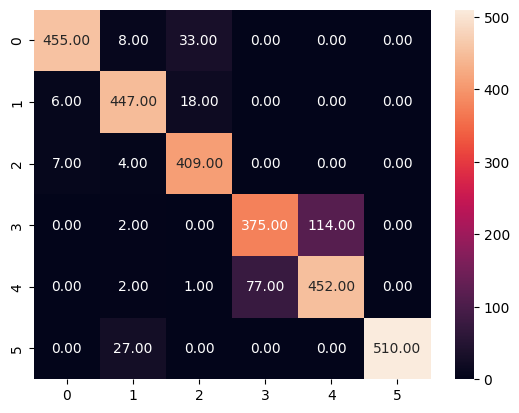

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=model_lstm.predict(testX)
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

---
cnn + lstm

In [29]:
flat_cnn.shape

(None, 1760)

In [30]:
pool_1,pool_2,pool_3.shape

(<KerasTensor shape=(None, 98, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_9>,
 <KerasTensor shape=(None, 74, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_15>,
 (None, 55, 32))

In [31]:
##Level_1
# layer 1
inputs1_1= Input(shape=(n_timesteps,n_features))##128,9
conv1_1 = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs1_1) ##none,126,128
# layer 2
inputs1_2= Input(shape=(n_timesteps,n_features))
conv1_2 = Conv1D(filters=128, kernel_size=5, activation='relu')(inputs1_2)##124,128
# layer 3
inputs1_3= Input(shape=(n_timesteps,n_features))
conv1_3 = Conv1D(filters=128, kernel_size=7, activation='relu')(inputs1_3)##122,128
# layer 4
inputs1_4= Input(shape=(n_timesteps,n_features))
conv1_4 = Conv1D(filters=128, kernel_size=9, activation='relu')(inputs1_4)##120,128

# merge1
merged_1 = concatenate([conv1_1,conv1_2,conv1_3,conv1_4],axis=1)

#maxpool1
pool_1=MaxPooling1D(pool_size=5)(merged_1)

##Level_2
# layer 1
conv2_1 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool_1)
# layer 2
conv2_2 = Conv1D(filters=64, kernel_size=5, activation='relu')(pool_1)
# layer 3
conv2_3 = Conv1D(filters=64, kernel_size=7, activation='relu')(pool_1)
# layer 4

conv2_4 = Conv1D(filters=64, kernel_size=9, activation='relu')(pool_1)
# merge2
merged_2 = concatenate([conv2_1,conv2_2,conv2_3,conv2_4],axis=1)

#maxpool2
pool_2=MaxPooling1D(pool_size=5)(merged_2)


##Level_3
# layer 1
conv3_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(pool_2)
# layer 2
conv3_2 = Conv1D(filters=32, kernel_size=5, activation='relu')(pool_2)
# layer 3
conv3_3 = Conv1D(filters=32, kernel_size=7, activation='relu')(pool_2)
# layer 4

conv3_4 = Conv1D(filters=32, kernel_size=9, activation='relu')(pool_2)
# merge2
merged_3 = concatenate([conv3_1,conv3_2,conv3_3,conv3_4],axis=1)

#maxpool2
pool_3=MaxPooling1D(pool_size=5)(merged_3)


#flatten
# flat_cnn=Flatten()(pool_3)
#아오 너 하지마 그냥

lstm = LSTM(64)(pool_3)

##dense layer
dense = Dense(512, activation='relu')(lstm)
outputs = Dense(n_outputs, activation='softmax')(dense)

##MODEL
cnn3_lstm_model = Model([inputs1_1, inputs1_2, inputs1_3,inputs1_4], outputs)

cnn3_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn3_lstm_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 126, 128)  │      3,584 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 124, 128)  │      5,888 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 122, 128)  │      8,192 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 120, 128)  │     10,496 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 492, 128)  │          0 │ conv1d_12[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_13[0][0],  │
│                     │                   │            │ conv1d_14[0][0],  │
│                     │                   │            │ conv1d_15[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 98, 128)   │          0 │ concatenate_3[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 96, 64)    │     24,640 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 94, 64)    │     41,024 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 92, 64)    │     57,408 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 90, 64)    │     73,792 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 372, 64)   │          0 │ conv1d_16[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_17[0][0],  │
│                     │                   │            │ conv1d_18[0][0],  │
│                     │                   │            │ conv1d_19[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 74, 64)    │          0 │ concatenate_4[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 72, 32)    │      6,176 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 70, 32)    │     10,272 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 68, 32)    │     14,368 │ max_pooling1d_4[

 Total params: 335,494 (1.28 MB)

 Trainable params: 335,494 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
cnn3_lstm_model_history=cnn3_lstm_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5602 - loss: 0.9569 - val_accuracy: 0.9202 - val_loss: 0.2061
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9270 - loss: 0.1922 - val_accuracy: 0.9508 - val_loss: 0.1169
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9440 - loss: 0.1374 - val_accuracy: 0.9542 - val_loss: 0.1029
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9506 - loss: 0.1133 - val_accuracy: 0.9457 - val_loss: 0.1218
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9436 - loss: 0.1439 - val_accuracy: 0.9576 - val_loss: 0.1018
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9529 - loss: 0.1090 - val_accuracy: 0.9593 - val_loss: 0.0899
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9613 - loss: 0.0949 - val_accuracy: 0.9576 - val_loss: 0.0945
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9574 - loss: 0.0965 - val_accu

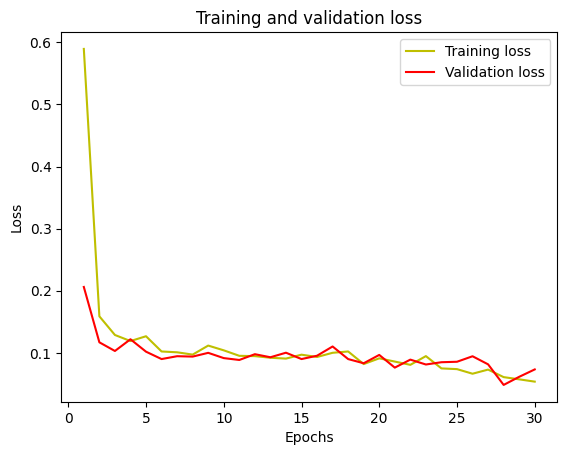

In [33]:
loss =cnn3_lstm_model_history.history['loss']
val_loss =cnn3_lstm_model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

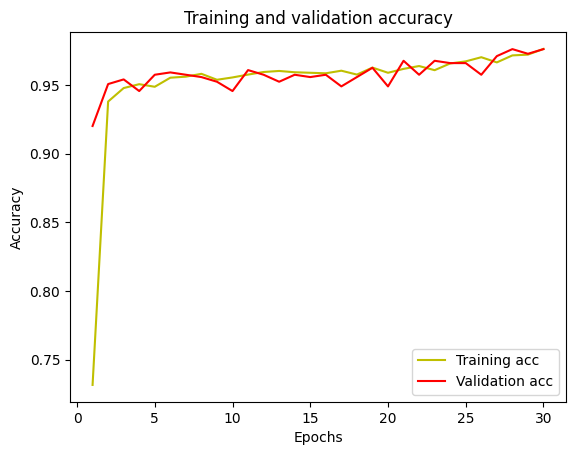

In [34]:
acc =cnn3_lstm_model_history.history['accuracy']
val_acc =cnn3_lstm_model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[[456   6   2   7   2  23]
 [  0 443   0   0   4  24]
 [  1   1 417   0   0   1]
 [  0   1   0 415  69   6]
 [  0   0   0  87 445   0]
 [  0   0   0  17   0 520]]
0.9148286392941974
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       496
           1       0.98      0.94      0.96       471
           2       1.00      0.99      0.99       420
           3       0.79      0.85      0.82       491
           4       0.86      0.84      0.85       532
           5       0.91      0.97      0.94       537

    accuracy                           0.91      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.91      0.92      2947



<Axes: >

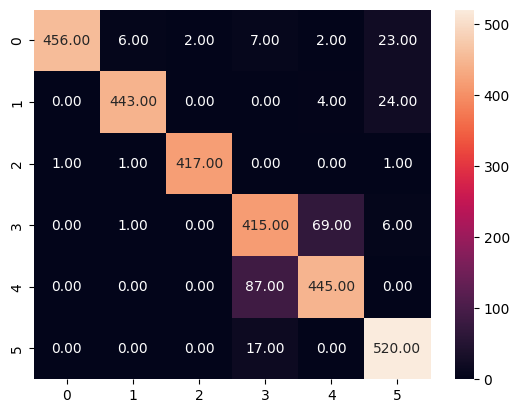

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=cnn3_lstm_model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

쪼맨한 lstm을 넣었더니 f1-score가 오르고 acc가 조금 내려감 ?

---
resnet

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models, activations


In [37]:
class MultiHeadSelfAttention(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        assert dim % num_heads == 0, "hidden_dim must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = dim // num_heads

        self.query = layers.Dense(dim)
        self.key = layers.Dense(dim)
        self.value = layers.Dense(dim)
        self.out = layers.Dense(dim)
    def call(self, x):
        B = tf.shape(x)[0]
        N = tf.shape(x)[1]
        D = x.shape[-1]
        H = self.num_heads
        d = self.head_dim

        # Linear projections
        Q = tf.reshape(self.query(x), (B, N, H, d))
        K = tf.reshape(self.key(x), (B, N, H, d))
        V = tf.reshape(self.value(x), (B, N, H, d))

        Q = tf.transpose(Q, perm=[0, 2, 1, 3])  # (B, H, N, d)
        K = tf.transpose(K, perm=[0, 2, 1, 3])
        V = tf.transpose(V, perm=[0, 2, 1, 3])

        # Scaled Dot-Product Attention
        attn_score = tf.matmul(Q, K, transpose_b=True) / tf.sqrt(tf.cast(d, tf.float32))
        attn_weight = tf.nn.softmax(attn_score, axis=-1)
        attn_out = tf.matmul(attn_weight, V)  # (B, H, N, d)

        # Concat heads
        attn_out = tf.transpose(attn_out, perm=[0, 2, 1, 3])  # (B, N, H, d)
        attn_out = tf.reshape(attn_out, (B, N, D))  # (B, N, D)
        return self.out(attn_out)

In [38]:
# -----------------------------
# Transformer Encoder Layer
# -----------------------------
class CustomTransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads=4, ff_dim=128, dropout=0.1):
        super().__init__()
        self.attn = MultiHeadSelfAttention(dim, num_heads)
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.ff = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(dim),
        ])
        self.dropout = layers.Dropout(dropout)

    def call(self, x, training=False):
        attn_out = self.attn(x)
        x = self.norm1(x + self.dropout(attn_out, training=training))
        ff_out = self.ff(x)
        x = self.norm2(x + self.dropout(ff_out, training=training))
        return x


In [39]:
# -----------------------------
# ResNet Block
# -----------------------------
class ResNetBlock(tf.keras.layers.Layer):
    def __init__(self, channels):
        super().__init__()
        self.conv1 = layers.Conv1D(channels, 3, padding='same')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv1D(channels, 3, padding='same')
        self.bn2 = layers.BatchNormalization()
        self.relu = layers.ReLU()

    def call(self, x, training=False):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out, training=training)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out, training=training)
        out = out + residual
        return self.relu(out)


In [75]:
# -----------------------------
# 전체 모델: ResNet + Transformer + 분류기
# -----------------------------
class ResNetTransformerClassifier(tf.keras.Model):
    def __init__(self, input_dim, hidden_dim, num_classes,
                 num_resnet_blocks=2, num_transformer_layers=2,
                 num_heads=4, ff_dim=128):
        super().__init__()
        self.fc0 = layers.Dense(hidden_dim)
        self.resnet_blocks = [ResNetBlock(hidden_dim) for _ in range(num_resnet_blocks)]
        self.transformer_layers = [
            CustomTransformerEncoderLayer(hidden_dim, num_heads, ff_dim)
            for _ in range(num_transformer_layers)
        ]
        self.fc_out = layers.Dense(num_classes, activation=None)

    def call(self, x, training=False):
        # x: (B, T, F)
        x = self.fc0(x)  # (B, T, H)

        for block in self.resnet_blocks:
            x = block(x, training=training)  # Conv1D 기반 지역 특징 추출

        for layer in self.transformer_layers:
            x = layer(x, training=training)  # 시퀀스 관계 학습

        x = tf.reduce_mean(x, axis=1)  # (B, H), Global Average Pooling
        logits = self.fc_out(x)
        probs = tf.nn.softmax(logits, axis=-1)
        return logits#, probs

In [71]:
# -----------------------------
# ✅ 모델 테스트
# -----------------------------
if __name__ == "__main__":
    model = ResNetTransformerClassifier(
        input_dim=128,    # 예시 입력 feature 수
        hidden_dim=64,
        num_classes=5,    # 예시: 5-class 분류
        num_resnet_blocks=2,
        num_transformer_layers=2
    )

    dummy = tf.random.normal((16, 128))  # (batch, feature)
    logits, probs = model(dummy)
    print("logits:", logits.shape)
    print("probs:", probs.shape)

ValueError: Exception encountered when calling ResNetBlock.call().

[1mInput 0 of layer "conv1d_80" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (16, 64)[0m

Arguments received by ResNetBlock.call():
  • x=tf.Tensor(shape=(16, 64), dtype=float32)
  • training=False

---
트랜스포머

In [53]:
# -----------------------------
# ✅ 모델 테스트
# -----------------------------
if __name__ == "__main__":
    model = CustomTransformerEncoderLayer(
        dim = 64
    )

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()

AttributeError: 'CustomTransformerEncoderLayer' object has no attribute 'compile'

In [45]:
transformer_model_history=transformer_model.fit(x=X_train, y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30


ValueError: Layer "functional_9" expects 4 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'data:0' shape=(None, 128, 9) dtype=float32>]

resnet + 트랜스포머

In [76]:
from tensorflow.keras import optimizers, losses, metrics

# -----------------------------
# ✅ 모델 테스트
# -----------------------------
if __name__ == "__main__":
    model = ResNetTransformerClassifier(
        input_dim=9,      # feature 수 (UCI-HAR은 9)
        hidden_dim=64,
        num_classes=6,    # UCI-HAR: 6가지 동작
        num_resnet_blocks=2,
        num_transformer_layers=2
    )

    model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss=losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

    # ---------------------------------------------------
    # 모델 학습
    # ---------------------------------------------------
    history = model.fit(
        trainX, trainy_one_hot,
        validation_data=(testX, testy_one_hot),
        epochs=30,
        batch_size=64,
        verbose=1
    )

Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 29s 108ms/step - accuracy: 0.8192 - loss: 0.4550 - val_accuracy: 0.4201 - val_loss: 3.6329
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9479 - loss: 0.1233 - val_accuracy: 0.6108 - val_loss: 1.3950
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9580 - loss: 0.1020 - val_accuracy: 0.8320 - val_loss: 0.5266
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9538 - loss: 0.1053 - val_accuracy: 0.9315 - val_loss: 0.2426
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9626 - loss: 0.0948 - val_accuracy: 0.9121 - val_loss: 0.2704
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9605 - loss: 0.0935 - val_accuracy: 0.9111 - val_loss: 0.3324
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9678 - loss: 0.0805 - val_accuracy: 0.9365 - val_loss: 0.2278
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9710 - loss: 0.0719 - val_ac

In [83]:
model.summary()

Model: "res_net_transformer_classifier_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_305 (Dense)               │ (None, 128, 64)        │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_36 (ResNetBlock)  │ ?                      │        25,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_block_37 (ResNetBlock)  │ ?                      │        25,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_transformer_encoder_lay… │ ?                      │        33,472 │
│ (CustomTransformerEncoderLayer) │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_transformer_encoder_lay… │ ?                      │        33,472 │
│ (CustomTransformerEncoderLayer) │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_318 (Dense)               │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,196 (1.35 MB)

 Trainable params: 117,894 (460.52 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 235,790 (921.06 KB)

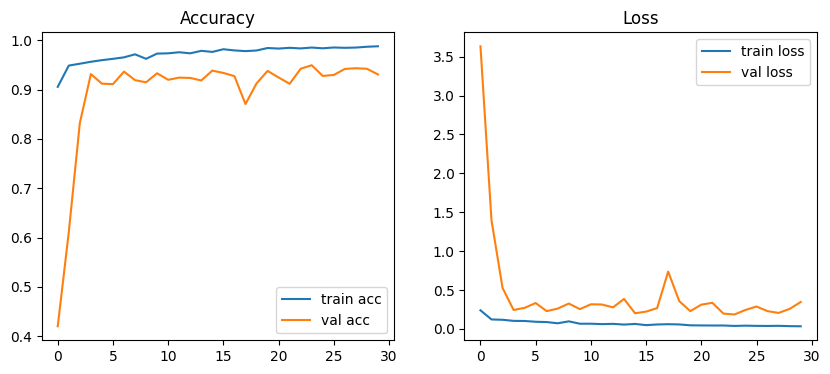

In [77]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss")
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
[[432  11  44   8   1   0]
 [  2 436  33   0   0   0]
 [  1   4 415   0   0   0]
 [  0   1   0 408  60  22]
 [  2   0   0  15 515   0]
 [  0   0   0   0   0 537]]
0.9307770614183916
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       496
           1       0.96      0.93      0.94       471
           2       0.84      0.99      0.91       420
           3       0.95      0.83      0.89       491
           4       0.89      0.97      0.93       532
           5       0.96      1.00      0.98       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



<Axes: >

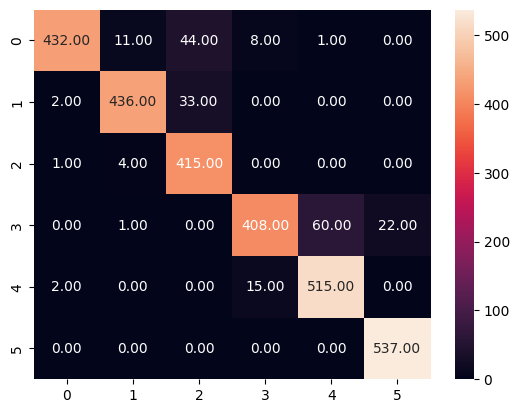

In [82]:
pred=model.predict(testX)
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')